### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports libraries needed for analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the turtle_reviews.csv as reviews dataframe.
reviews = pd.read_csv('turtle_reviews.csv')

# View the dataframe.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Check the size of the dataframe.
reviews.shape

(2000, 11)

In [4]:
# Check if there are any missing data presented in the dataframe.
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [5]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
# Explore descriptive statistics for numeric data.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [7]:
# Remove redundant columns (language and platform).
reviews = reviews.drop(['language', 'platform'], axis=1)

# View column names and chck the shape of the dataframe.
print(reviews.shape)
reviews.head()

(2000, 9)


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [8]:
# Renaming the columns ("remuneration (k£)" and "spending_score (1-100)") headers.
reviews.rename(columns={"remuneration (k£)":"remuneration", "spending_score (1-100)":"spending_score"}, inplace=True)

# View column names.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
reviews.to_csv("reviews.csv", index=False)

In [10]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [11]:
# Sense check the dataframe.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 5. Linear regression

Let's evaluate possible linear relationships between loyalty points and spending scores/remuneration/age to determine whether these can be used to predict the loyalty points?

### 5a) spending vs loyalty

In [12]:
# Dependent variable (y) is loyalty points.
y = reviews['loyalty_points'] 

# Independent variable (x) is spending score.
x = reviews['spending_score']

# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        15:55:47   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R 2 : 45.2% of the total variability of y (loyalty points the customers have), is explained by the variability of X (how much they spent or spending score). X: The coefficient of X describes the slope of the regression line or how much the response variable y change when X changes by 1 unit. So, if the spending score that the customer has (X) changes by 1 unit the loyalty (y) will change by 33.0617 units. The t-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is zero, thus the estimated slope is significant. The last two numbers describe the 95% confidence interval of the true x coefficient, i.e. the true slope. For instance, if you take a different sample, the estimated slope will be slightly different. If you take 100 random samples each of 500 observations of X and y, then 95 out of the 100 samples will derive a slope that is within the interval (31.464, 34.659).

In [13]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [14]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -75.052663 + 33.061693 * reviews['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

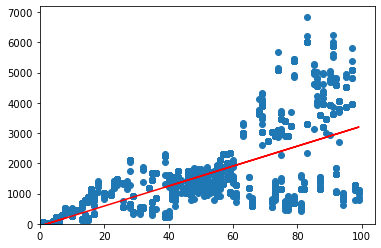

In [15]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) remuneration vs loyalty

In [16]:
# Dependent variable (y) is loyalty points.
y = reviews['loyalty_points'] 

# Independent variable (x) is remuniration.
x = reviews['remuneration']

# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        15:55:53   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R 2 : 38.0% of the total variability of y (loyalty points the customers have), is explained by the variability of X (remuniration). X: The coefficient of X describes the slope of the regression line or how much the response variable y change when X changes by 1 unit. So, if the remuniration of the customer has (X) changes by 1 unit the loyalty point (y) will change by 34.1878 units. The t-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is zero, thus the estimated slope is significant. The last two numbers describe the 95% confidence interval of the true xcoefficient, i.e. the true slope. For instance, if you take a different sample, the estimated slope will be slightly different. If you take 100 random samples each of 500 observations of X and y, then 95 out of the 100 samples will derive a slope that is within the interval (32.270, 36.106).

In [17]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [18]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -65.686513 + 34.187825 * reviews['remuneration']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

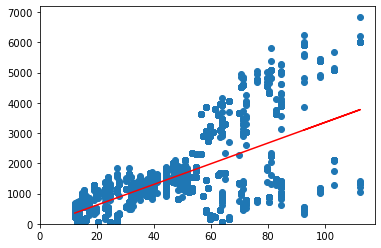

In [19]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

In [20]:
# Dependable variable (x) is loyalty points.
y = reviews['loyalty_points'] 

# Independent variable (x) is age.
x = reviews['age']

# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 17 Dec 2022   Prob (F-statistic):             0.0577
Time:                        15:56:00   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R 2 : Only 2.0% of the total variability of y (loyalty points the customers have), is explained by the variability of X (customer age). X: The coefficient of X describes the slope of the regression line or how much the response variable y change when X changes by 1 unit. So, if the age of the customer has (X) changes by 1 unit the loyalty point (y) will change by -4.0128 units. The t-value tests the hypothesis that the slope is significant or not. In this case, t-value is 0.058, thus the estimated slope is not significant.

In [21]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [22]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 1736.517739 - 4.012805 * reviews['age']

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

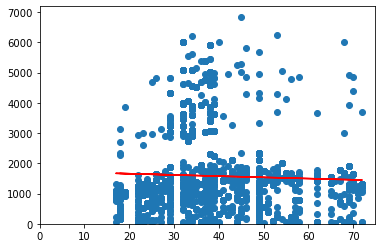

In [23]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5d) Multiple Linear Regression (MLR): remuneration and spending score vs loyalty. 

In [24]:
# Import all the necessary packages.
import statsmodels.stats.api as sms
import sklearn
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings  
warnings.filterwarnings('ignore')  

In [25]:
# Define the dependent variable y loyalty points.
y = reviews['loyalty_points']  

# Define the independent variables X.
X = reviews[['remuneration', 'spending_score', 'age']]

In [26]:
# Fit the regression model.
multi = LinearRegression()  
multi.fit(X, y)

LinearRegression()

In [27]:
# Call the predictions for X (array).
multi.predict(X)

array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

In [28]:
# Checking the value of R-squared, intercept and coefficients in the model.
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

R-squared:  0.8399114912748796
Intercept:  -2203.059751307902
Coefficients:


[('remuneration', 34.00838549260251),
 ('spending_score', 34.183196577633666),
 ('age', 11.060658711843345)]

In [29]:
# Make predictions. Create a variales new_remuneration and new_spending_score.
new_remuneration = 22.96
new_spending_score = 61
new_age = 37
print ('Predicted Value: \n', multi.predict([[new_remuneration ,new_spending_score, new_age]]))  

Predicted Value: 
 [1072.19214318]


In [30]:
# Train and test subsets with (MLR) multiple linear regression
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20)

In [31]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     2863.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:56:17   Log-Likelihood:                -12252.
No. Observations:                1600   AIC:                         2.451e+04
Df Residuals:                    1596   BIC:                         2.453e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2235.9312     58.595    -38.

In [32]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. Use training data set.
mlr.fit(X_train, Y_train)

LinearRegression()

In [33]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for train set: {}".format(y_pred_mlr)) 

Prediction for train set: [1295.50286551 1206.93455456 1679.59720144 ... -277.41460313 1383.13143105
 2658.61154599]


In [34]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [ 2658.61154599  1311.46973987  2094.97808552  1643.691456
   792.51341434   597.77880479  1438.73726929  1292.81950343
   -17.51650058  1540.5567647   1715.73227813   618.56859678
  2779.29508919   -33.76184195  1461.52114159  1137.47275011
  3802.61783508  1476.24483663  1905.4058358   4508.36238431
  1708.8021328   1072.86251067  3450.19558879  1650.04850342
  -186.42826963  1715.73227813  1535.24460518  1118.59557486
  1536.1328224   2230.59674266   858.43516923  1008.30508743
  1810.27850555  4246.89414369  -547.81443029  4019.35373211
  1722.30681734  1810.27850555  1114.37808299  1197.994165
  2163.03203504  1104.31198597  1792.0714117   1520.16594803
  3893.93112732  3597.99060711   887.23296627  1324.10301512
  1022.36238151  1421.09959291  2315.7948022   1843.35845012
  1364.22625243  3238.3597485   1534.02191423 -1328.45728634
  1056.14473532   552.75183029  1096.31646437  1364.32691637
  1375.39005354  1884.05910981  2026.29582943  3802.61783508
 -1

In [35]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

82.39766654969944


In [36]:
# Check for multicollinearity.
x_temp = sm.add_constant(X_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor        features
0        20.9           const
1         1.0    remuneration
2         1.1  spending_score
3         1.1             age


VIF factors for all 3 variables are close to 1, therefore multicollinearity is not a problem here.
No correlation or very weak correlation between variables were found.

In [37]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [38]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 36.30144522585326, 'LM Test p-value': 6.466178424835621e-08, 'F-stat': 12.35044235424477, 'F-test p-value': 5.4853553268168364e-08}


The Lagrange multiplier statistic for the test is 38.016 and the corresponding p-value is less than 0.05, we reject the null hypothesis (homoscedasticity is present)and have sufficient evidence to say that heteroscedasticity is present in the regression model.

In [39]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred)) 

Mean Absolute Error (Final): 405.6538643820422
Mean Square Error (Final): 270310.33899600833


## 6. Observations and insights

After sense checking and cleaning the given dataset, we tried to find if there are any relationships between the loyalty point and spending score/remuniration/age. Ordinary Least Squares (OLS) to estimate a linear regression model and fit a linear equation to observed data was used. The results are below:

*spending vs loyalty: y_pred = -75.052663 + 33.061693 * reviews['spending_score']*

*remuneration vs loyalty: y_pred = -65.686513 + 34.187825 * reviews['remuneration']*

*age vs loyalty: y_pred = 1736.517739 - 4.012805 * reviews['age']*

Only in the first two coefficients were significant according to t-value test. The last one(age vs loyalty) where the coefficient is actualy negative as well, the probability of  the t-value is 0.058>0.05, thus its not statistically significant. 

Spending vs loyalty has R2 is 45.2% and in remuneration vs loyalty it is 38%. Both are not great to predict loyalty. In order to improve the model we can try Multivariate regression model (MRL), taking all variables into consideration.

As a result we've got much higher R2, which means 83,6% of loyalty points variability is explained by variability of spending score, remuneration and age together. All coefficients are statistically significant, according to probability of t-value (0.00<0.05). Remuneration is 33.528 (so if it changes 1 unit, the value of y (loyalty points) increases by 33.528 units). Spending score cofficient is similar 34.368 and age is 10.806.
As VIF is close to 1.0 for all independant variables meaning no correlation found. We also check for heteroscedasticity, as it is a problem because ordinary least squares (OLS) regression assumes that the residuals come from a population that has homoscedasticity, which means constant variance. In our example it is present. 

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [46]:
# Import necessary libraries.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [47]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews.csv')

# View the DataFrame.
df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [48]:
# Drop unnecessary columns.
df2 = df2.drop(['review', 'summary'], axis = 1)

# View DataFrame.
df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product
0,Male,18,12.30,39,210,graduate,453
1,Male,23,12.30,81,524,graduate,466
2,Female,22,13.12,6,40,graduate,254
3,Female,25,13.12,77,562,graduate,263
4,Female,33,13.94,40,366,graduate,291


In [49]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 109.5+ KB


In [50]:
# Descriptive statistics.
df2.describe()

,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

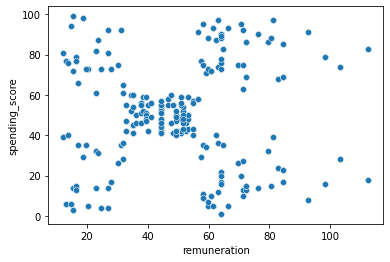

In [51]:
# Create a scatterplot with Seaborn.
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2)

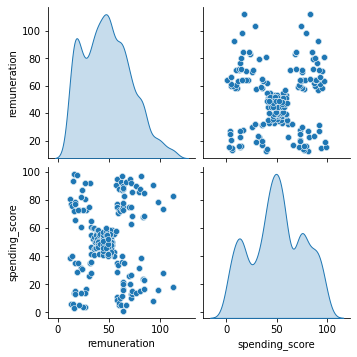

In [52]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]

sns.pairplot(df2,
             vars=x,
             diag_kind='kde')

## 3. Elbow and silhoutte methods

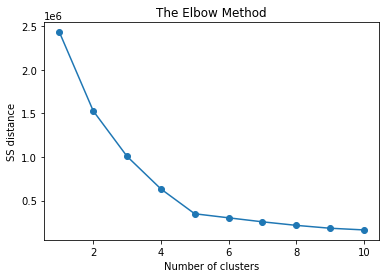

In [53]:
# Determine the number of clusters: Elbow method.
from sklearn.cluster import KMeans

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=500,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

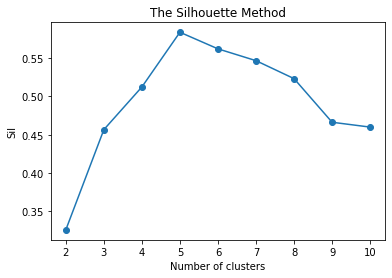

In [54]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

## 4a) Use 4 clusters:

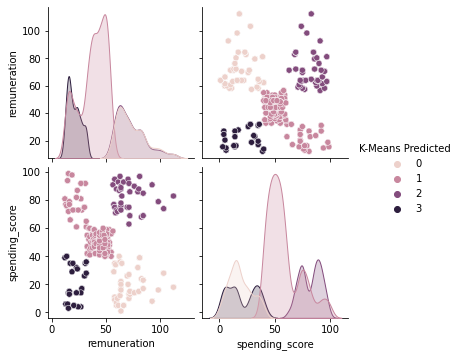

In [55]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [56]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts().sort_index(0)

0     351
1    1013
2     356
3     280
Name: K-Means Predicted, dtype: int64

In [57]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

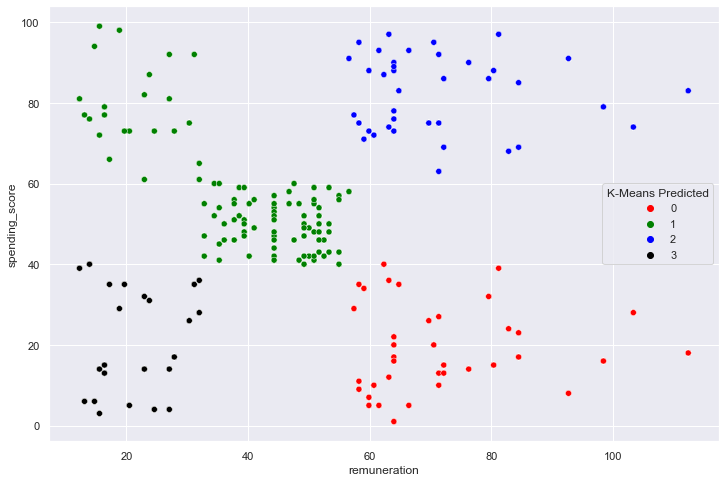

In [58]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue','black'])

## 4b) Use 5 clusters:

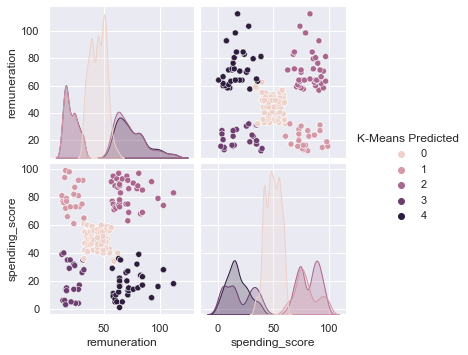

In [59]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [60]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts().sort_index(0)

0    774
1    269
2    356
3    271
4    330
Name: K-Means Predicted, dtype: int64

In [61]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

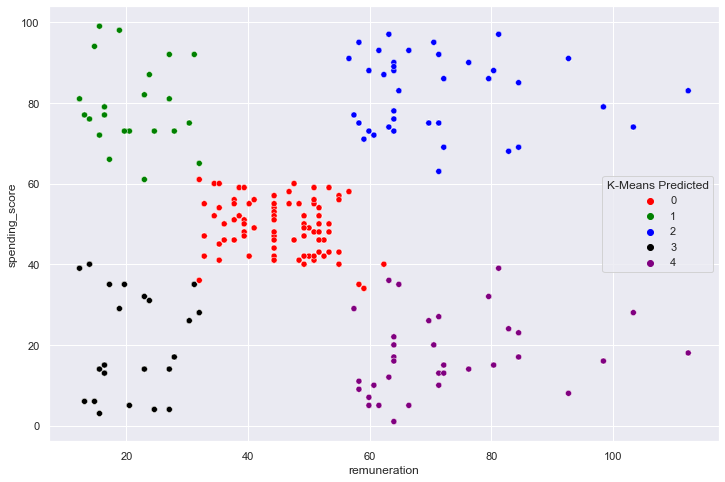

In [62]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue','black','purple'])

## 4c) Use 6 clusters:

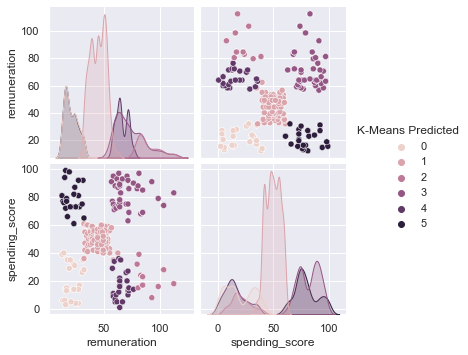

In [63]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [64]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts().sort_index(0)

0    271
1    767
2    123
3    356
4    214
5    269
Name: K-Means Predicted, dtype: int64

In [65]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  0
1         12.30              81                  5
2         13.12               6                  0
3         13.12              77                  5
4         13.94              40                  0


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

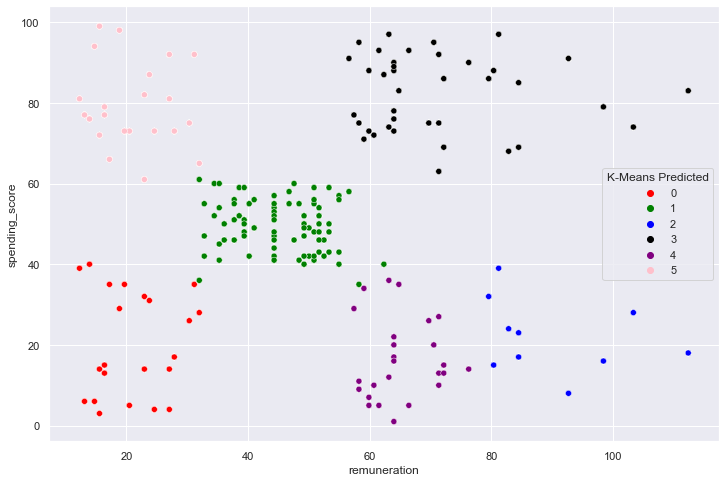

In [66]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue','black','purple','pink'])

## 5. Discuss: Insights and observations


It seems that k=5 (five clusters) might give the best results (groups) to target specific market segments based on remuneration and spending score. Cluster 0 is the largest group, as many users have remuneration and spending score about the mean value. The number of predicted values per class indicates a better distribution for k=5 than k=6 or k=4 (we compare predicted values with the data pairplot). Later scatterplot based on prediction of cluster membership is used to visually see the separation of predictive classification types based on remuneration and spending score.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [67]:
# Import all the necessary packages.
import nltk 
import os 

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/irinap/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/irinap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
# Load the data set as dataframe df3.
df3 = pd.read_csv('reviews.csv')

# View the DataFrame.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [69]:
# Explore data set. Define size and datatypes.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [70]:
# Keep necessary columns (only reviews and summary). Drop unnecessary columns.
df3 = df3.drop(['gender','age','remuneration','spending_score','loyalty_points','education','product'], axis=1)

# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [71]:
# Determine if there are any missing values in the dataframe.
df3.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [72]:
# Review column: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# View the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [73]:
# Summary column: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# View the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [74]:
# Replace all the punctuations in review column with blank spaces.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [75]:
# Replace all the puncuations in summary column with blank spaces.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [76]:
# Look for duplicates in review column.
df3.review.duplicated().sum()

# Drop duplicates in review column.
df3 = df3.drop_duplicates(subset=['review'])

# View DataFrame.
df3.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [77]:
# Look for duplicates in summary columns.
df3.summary.duplicated().sum()

# Drop duplicates in summary column.
df3 = df3.drop_duplicates(subset=['summary'])

# View DataFrame.
df3.reset_index(inplace=True)
df3.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

In [79]:
# Create new DataFrame (copy DataFrame).
df4 = df3

# View DataFrame.
df4.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [80]:
# Apply tokenisation to both columns (review and summary) and assign them to new columns.
df4['token_review'] = df4['review'].apply(word_tokenize)
df4['token_summary'] = df4['summary'].apply(word_tokenize)

# View DataFrame.
df4.head()

,index,review,summary,token_review,token_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [81]:
# Review: Create a word cloud.
# Create an empty string variable for all reviews.
all_review = ''
for i in range(df4.shape[0]):
    # Add each comment.
    all_review = all_review + df4['review'][i]

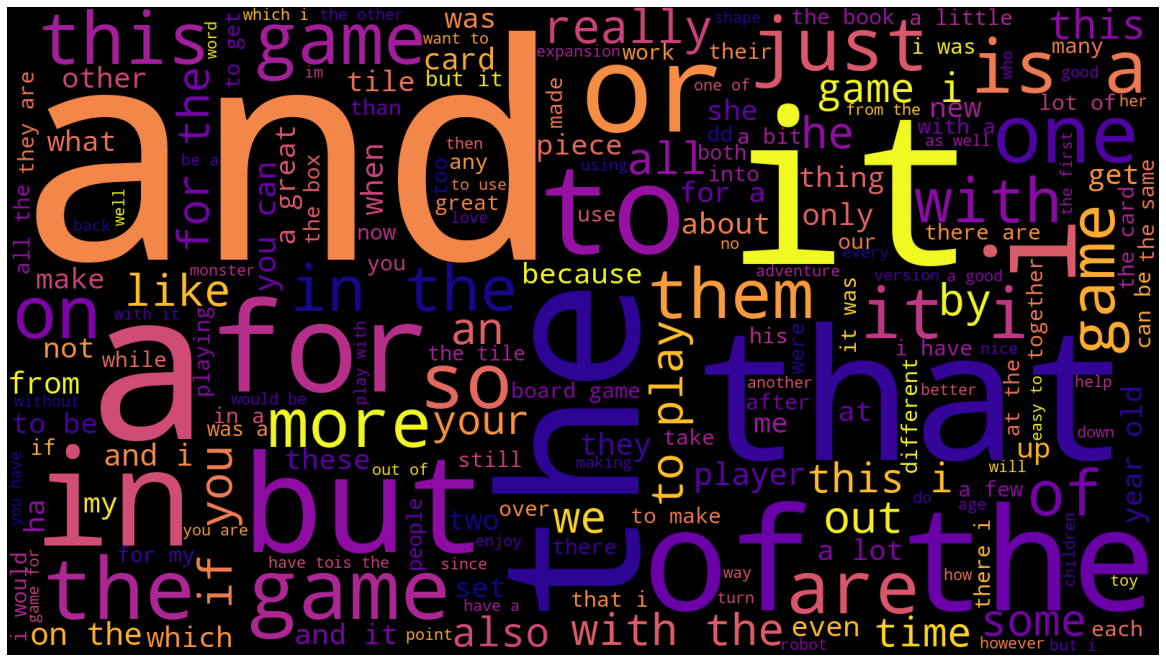

In [82]:
# Review: Plot the WordCloud image.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object (including stopwords).
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='black',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review) 

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [83]:
# Summary: Create a word cloud.
# Create an empty string variable for all summaries.
all_summary = ''
for i in range(df4.shape[0]):
    # Add each comment.
    all_summary = all_summary + df4['summary'][i]

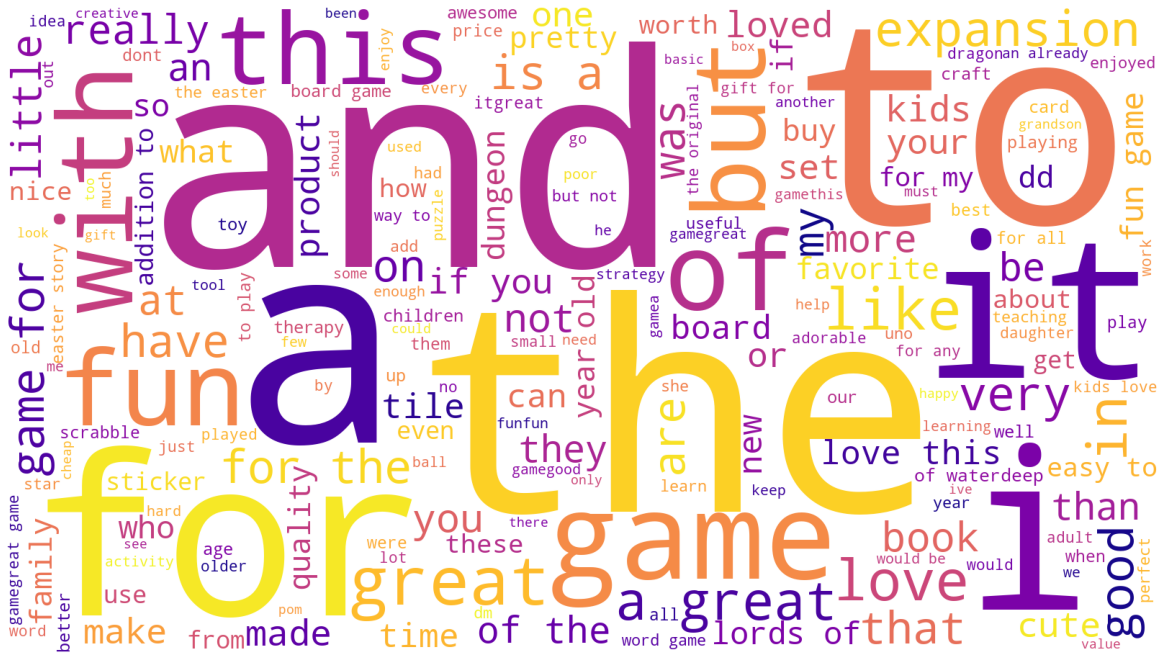

In [84]:
# Summary: Plot the WordCloud image.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object (including stopwords).
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary) 

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [85]:
# Create a list for tokenised review column.
# Define an empty list of tokens review.
all_tokens_review = []
for i in range(df4.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + df4['token_review'][i]

# Calculate the frequency distribution for review column.
freq_dist_of_words = FreqDist(all_tokens_review)

# Determine 5 most common words used in reviews.
freq_dist_of_words.most_common(5)

[('the', 5019), ('and', 2934), ('to', 2843), ('a', 2829), ('of', 2261)]

In [86]:
# Create a list for tokenised summary column.
# Define an empty list of tokens summary.
all_tokens_summary = []
for i in range(df4.shape[0]):
    # Add each token to the list.
    all_tokens_summary = all_tokens_summary + df4['token_summary'][i]

# Calculate the frequency distribution for summary column.
freq_dist_of_words = FreqDist(all_tokens_summary)

# Determine 5 most common words used in summary.
freq_dist_of_words.most_common(5)

[('game', 268), ('the', 257), ('a', 238), ('great', 236), ('for', 229)]

### 4b) Remove alphanumeric characters and stopwords

In [87]:
# Delete all the alphanum.
token_review = [word for word in all_tokens_review if word.isalnum()]
token_summary = [word for word in all_tokens_summary if word.isalnum()]

In [88]:
# Remove all the stopwords for reviews.
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of token_review without stop words.
token_review2 = [x for x in token_review if x.lower() not in english_stopwords]

# Define an empty string variable for reviews.
token_review2_string = ''
for value in token_review:
    # Add each filtered token word to the string.
    token_review2_string = token_review2_string + value + ' '

In [89]:
# Remove all the stopwords for summary.

# Create a filtered list of token_review without stop words.
token_summary2 = [x for x in token_summary if x.lower() not in english_stopwords]

# Define an empty string variable.
token_summary2_string = ''
for value in token_summary:
    # Add each filtered token word to the string.
    token_summary2_string = token_summary2_string + value + ' '

### 4c) Create wordcloud without stopwords

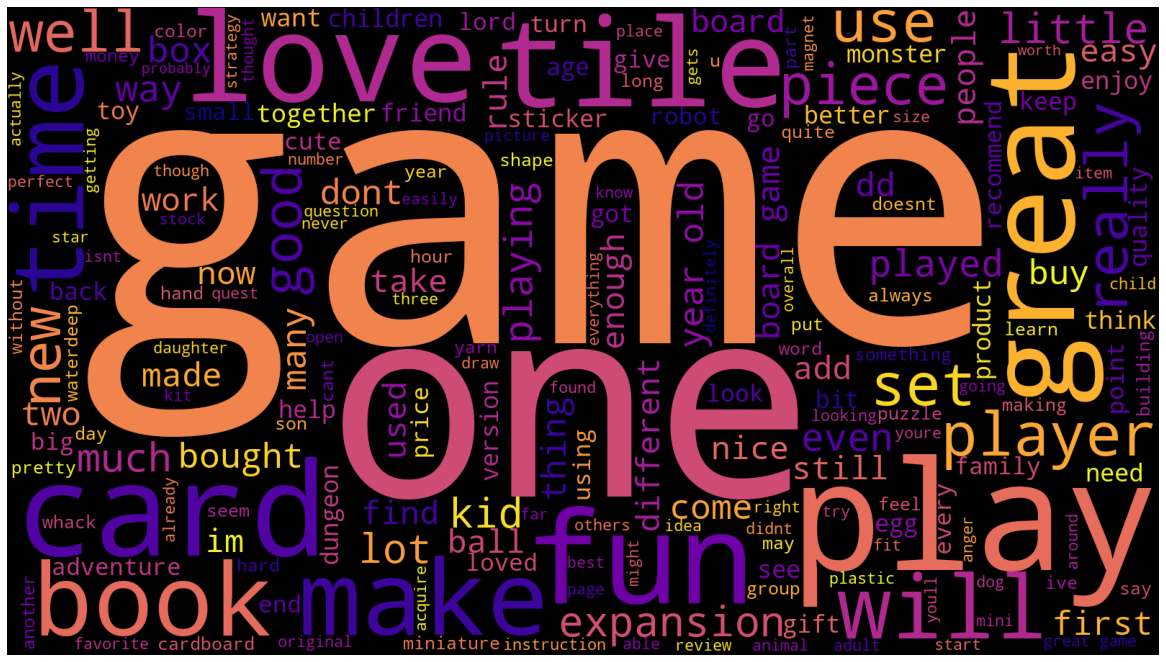

In [90]:
# Create a wordcloud object without stopwords for reviews.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='black', 
                colormap='plasma', 
                min_font_size = 10).generate(token_review2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

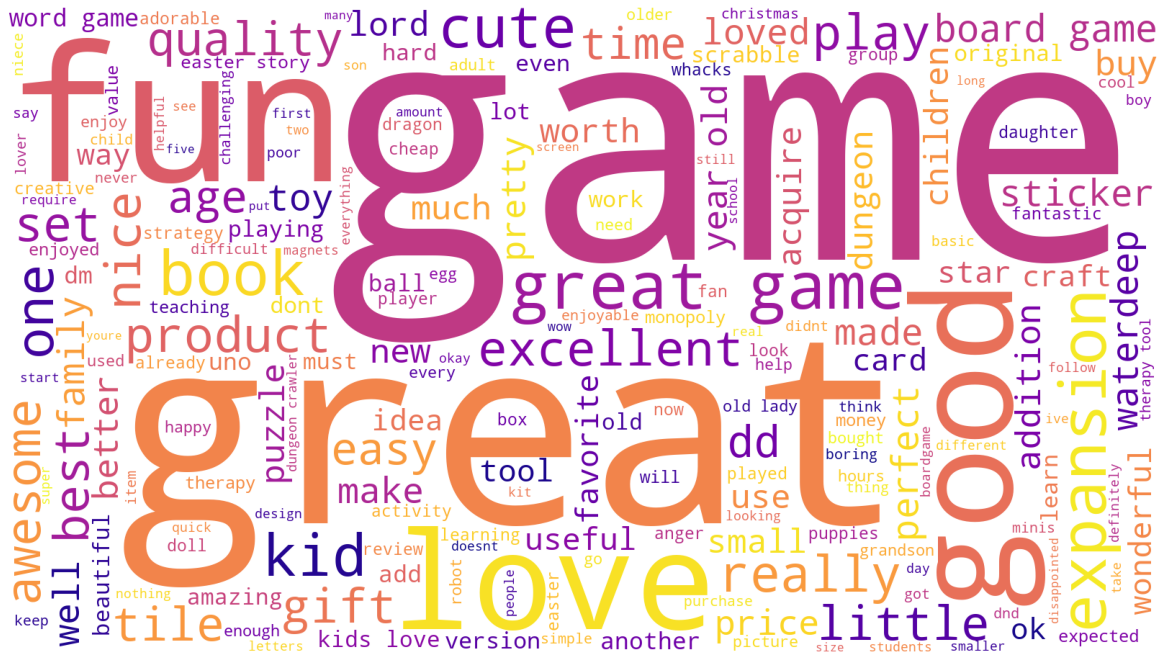

In [91]:
# Create a wordcloud without stopwords for summary.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(token_summary2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [92]:
# Determine the 15 most common words for reviews.
# View the frequency distribution for reviews.
fdist1 = FreqDist(token_review2)

# Preview the data.
fdist1

FreqDist({'game': 1359, 'one': 475, 'play': 442, 'fun': 407, 'great': 391, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [93]:
# Present the data for frequency of words used in reviews in more readable format.

# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter for reviews.
count_review = pd.DataFrame(Counter(token_review2).most_common(15), 
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
count_review

,Frequency
Word,
game,1359
one,475
play,442
fun,407
great,391
like,373
get,293
cards,281
tiles,280


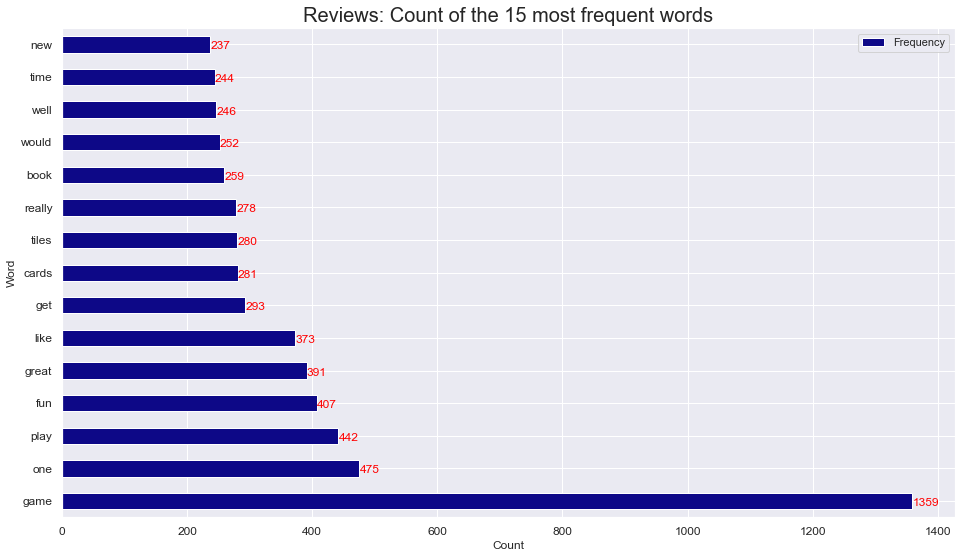

In [94]:
# Visualise the most frequent words used in review.
# Set the plot type.
ax = count_review.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Reviews: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [95]:
# Generate a DataFrame from Counter for summaries.
count_summary = pd.DataFrame(Counter(token_summary2).most_common(15), 
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
count_summary

,Frequency
Word,
game,268
great,236
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


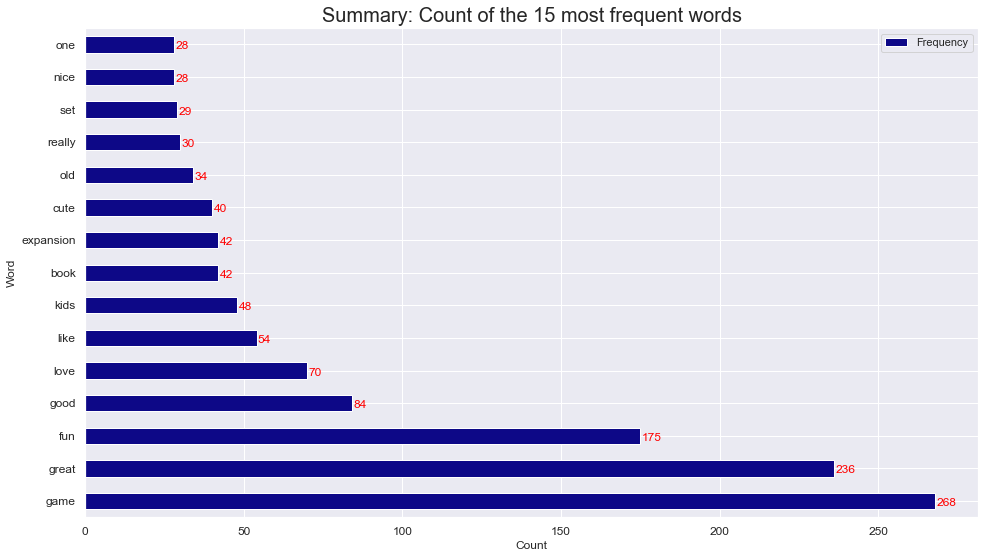

In [96]:
# Visualise the most frequent words used in summary.
# Set the plot type.
ax = count_summary.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Summary: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [97]:
# Install TextBlob.
!pip install textblob

# Import the necessary package.
from textblob import TextBlob

In [98]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

## Review column analysis.

In [99]:
# Determine polarity for review column. 

# Populate a new column with polarity scores for each comment.
df4['polarity_review'] = df4['review'].apply(generate_polarity)

# Preview the result.
df4['polarity_review'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_review, dtype: float64

The function (polarity) works by extracting the relevant score from the sentiment method for each review.

In [100]:
# Define a function to extract a subjectivity score for the review.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each review.
df4['subjectivity_review'] = df4['review'].apply(generate_subjectivity)

# Preview the result.
df4['subjectivity_review'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity_review, dtype: float64

The function (subjectivity) works by extracting the relevant score from the sentiment method for each review.

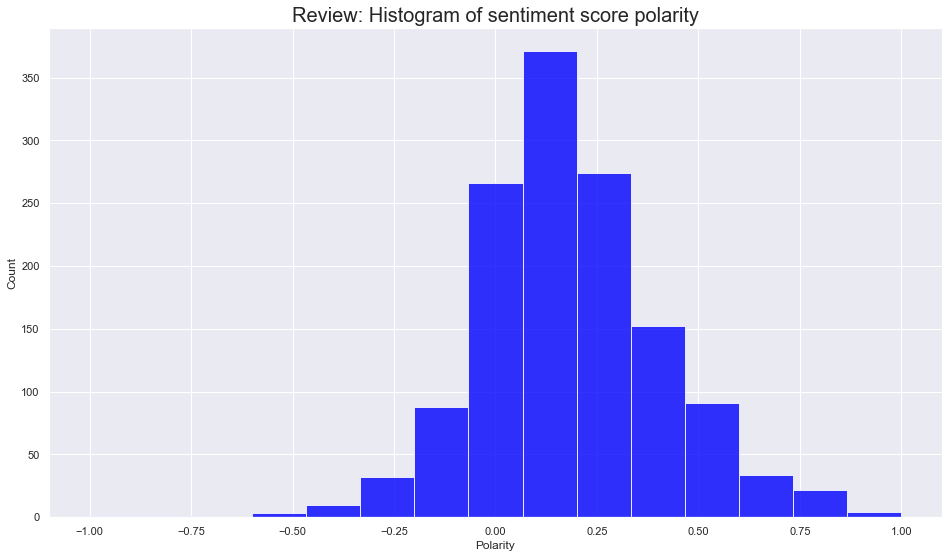

In [101]:
# Visualise sentiment polarity scores for reviews.
# Review: Create a histogram plot with bins = 15.
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_review'], num_bins, facecolor='blue', alpha=0.8)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Review: Histogram of sentiment score polarity', fontsize=20)

plt.show()

## Summary column analysis:

In [102]:
# Determine polarity for summary column.

# Populate a new column with polarity scores for each summary.
df4['polarity_summary'] = df4['summary'].apply(generate_polarity)

# Preview the result.
df4['polarity_summary'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64

In [103]:
# Define a function to extract a subjectivity score for the summary.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each summary.
df4['subjectivity_summary'] = df4['summary'].apply(generate_subjectivity)

# Preview the result.
df4['subjectivity_summary'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity_summary, dtype: float64

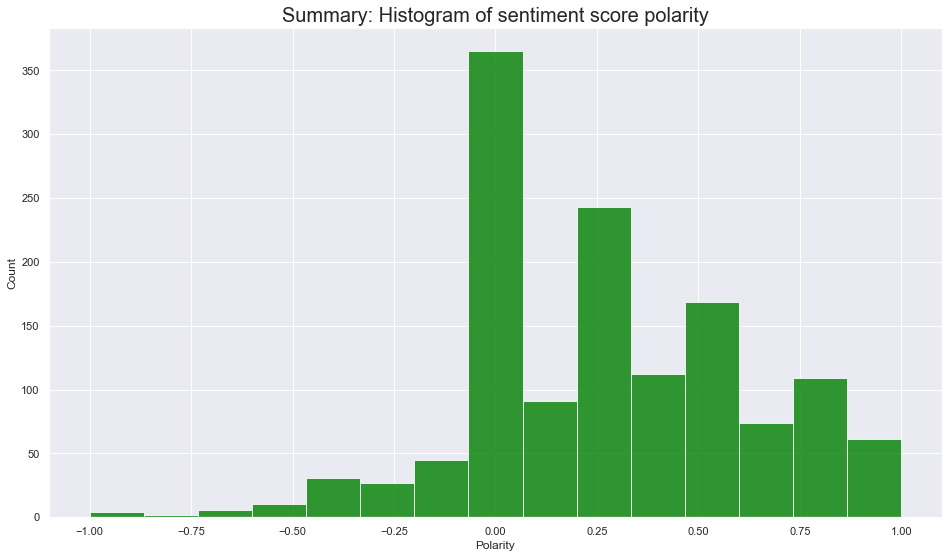

In [105]:
# Visualise sentiment polarity scores for summaries.
# Summary: Create a histogram plot with bins = 15.
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_summary'], num_bins, facecolor='green', alpha=0.8)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summary: Histogram of sentiment score polarity', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [120]:
# Top 20 negative reviews.
# Create a DataFrame for 20 negative reviews.
negative_sentiment = df4.nsmallest(20, 'polarity_review')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['review', 'polarity_review', 'subjectivity_review']]

# View output.
negative_sentiment.style.set_properties(subset=['review'])

,review,polarity_review,subjectivity_review
165,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000,1.000000
147,incomplete kit very disappointing,-0.780000,0.910000
267,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000,0.300000
90,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000,0.900000
141,i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed,-0.491667,0.433333
251,my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed,-0.446250,0.533750
382,i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through,-0.440741,0.485185
312,this game although it appears to be like uno and have an easier play method it was still too time consuming and wordy for my children with learning disabilities,-0.400000,0.400000
355,my son loves playing this game it was recommended by a counselor at school that works with him,-0.400000,0.400000
713,if you like me used to play dd but now you and your friends growed up and cant be together because all the responsibilities and bla bla bla this game is for you come to the dungeon,-0.400000,0.400000


In [124]:
negative_sentiment.at[141, 'review']

'i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed'

In [116]:
# Top 20 negative summaries.
# Create a DataFrame for 20 negative summaries.
negative_sentiment = df4.nsmallest(20, 'polarity_summary')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['summary', 'polarity_summary', 'subjectivity_summary']]

# View output.
negative_sentiment.style.set_properties(subset=['summary'])

,summary,polarity_summary,subjectivity_summary
17,the worst value ive ever seen,-1.000000,1.000000
165,boring unless you are a craft person which i am,-1.000000,1.000000
587,boring,-1.000000,1.000000
837,before this i hated running any rpg campaign dealing with towns because it,-0.900000,0.700000
1,another worthless dungeon masters screen from galeforce9,-0.800000,0.900000
116,disappointed,-0.750000,0.750000
266,promotes anger instead of teaching calming methods,-0.700000,0.200000
634,too bad this is not what i was expecting,-0.700000,0.666667
637,bad qualityall made of paper,-0.700000,0.666667
144,at age 31 i found these very difficult to make,-0.650000,1.000000


In [117]:
# Top 20 positive reviews.
# Create a DataFrame for 20 most positive reviews.
positive_sentiment = df4.nlargest(20, 'polarity_review')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['review', 'polarity_review', 'subjectivity_review']]

# View the output.
positive_sentiment.style.set_properties(subset=['review'])

,review,polarity_review,subjectivity_review
564,perfect,1.000000,1.000000
1080,my daughter loves her stickers awesome seller thank you,1.000000,1.000000
1334,perfect for tutoring my grandson in spelling,1.000000,1.000000
890,the best part i see is the box what a wonderfully diverse and rounded set for the cost i am so happy and as the dm you know that if i am happy my players are happy,0.880000,0.860000
498,great quality very cute and perfect for my toddler,0.816667,0.916667
31,the pictures are great ive done one and gave it to a friend of mine who likes dragons,0.800000,0.750000
336,great seller happy with my purchase 5 starrrr,0.800000,0.875000
439,great easter gift for kids,0.800000,0.750000
491,these are great,0.800000,0.750000
692,bought this because i wanted it all these dd games are great,0.800000,0.750000


In [118]:
# Top 20 positive summaries.
# Create a DataFrame for 20 most positive summaries.
positive_sentiment = df4.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['summary', 'polarity_summary', 'subjectivity_summary']]

# View output.
positive_sentiment.style.set_properties(subset=['summary'])

,summary,polarity_summary,subjectivity_summary
5,best gm screen ever,1.000000,0.300000
23,wonderful designs,1.000000,1.000000
27,perfect,1.000000,1.000000
61,theyre the perfect size to keep in the car or a diaper,1.000000,1.000000
107,perfect for preschooler,1.000000,1.000000
112,awesome sticker activity for the price,1.000000,1.000000
132,awesome book,1.000000,1.000000
133,he was very happy with his gift,1.000000,1.000000
150,awesome,1.000000,1.000000
166,awesome and welldesigned for 9 year olds,1.000000,1.000000


# 7. Identify named entities

## Review column:

In [495]:
# Install spaCy.
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 17.9 MB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [496]:
# Install and import the spaCy library.
!pip install spaCy
import spacy

# Load the English resource.
nlp = spacy.load('en_core_web_sm')

# Return the text snippet and its corresponding entity label in a list.
def generate_named_entities(comment):
    return [(ent.text.strip(), ent.label_) for ent in nlp(comment).ents]

In [497]:
df4['named_entities_review'] = df4['review'].apply(generate_named_entities)

df4.head()

,index,review,summary,token_review,token_summary,polarity_review,subjectivity_review,polarity_summary,subjectivity_summary,named_entities_review
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.486111,0.15,0.500000,"[(50, CARDINAL), (2, CARDINAL), (1, CARDINAL)]"
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,0.442976,-0.80,0.900000,"[(galeforce9, ORG)]"
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.430435,0.00,0.733333,"[(two, CARDINAL), (one, CARDINAL), (one, CARDI..."
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.784848,0.00,0.000000,[]
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.316667,0.00,0.000000,"[(gf9s, ORG)]"


In [498]:
from spacy import displacy

# Iterate through a selection of reviews.
for i in range(750,1750):
    # Check whether the corresponding review has a named entity.
    if df4['named_entities_review'][i]:
        # Highlight the entity in the comment.
        displacy.render(nlp(df4['review'][i]), style='ent', jupyter=True)

KeyError: 1349

In [500]:
# Generate a document-term matrix (DTM). 

# Import the necessary classes.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(df4['review'])

In [509]:
# Set the parameters.
# Create a DataFrame to look at the first 15 documents.
dt = pd.DataFrame(cvs.todense()).iloc[:15]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 16)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))

         Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
screen       0      1      0      0      0      1      0      0      0   
pretty       0      0      2      0      0      0      0      0      0   
art          2      0      0      0      0      0      0      0      0   
good         0      0      0      0      0      0      0      0      0   
dm           0      0      0      0      0      0      0      0      0   
useless      0      0      1      0      0      0      0      0      0   
money        0      0      0      0      1      0      0      0      0   
mommer       0      0      0      0      0      0      0      0      0   
missed       0      0      0      0      0      0      0      1      0   
product      0      0      0      0      0      0      0      1      0   

         Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  
screen        1       0       0       0       0       0  
pretty        0       0       0       0       0       0  
art        

Each row indicates a unique word that appeared across the reviews, while the columns represent a unique document (the individual survey responses).

<AxesSubplot:>

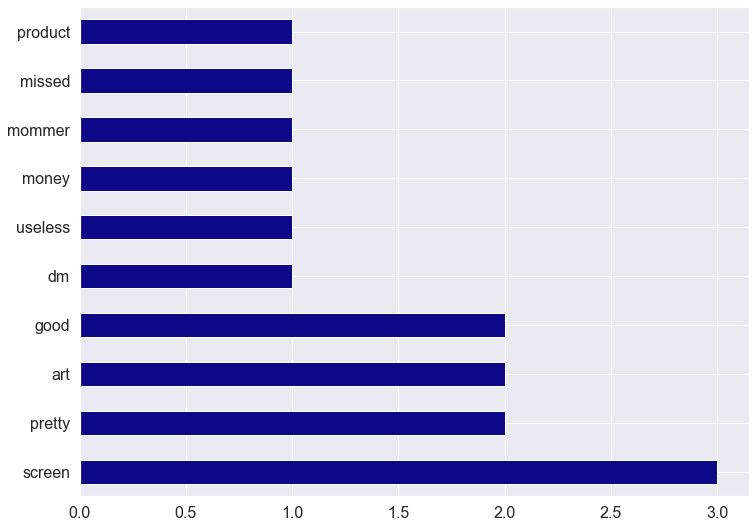

In [510]:
# Identify frequently used words in this sample of reviews.
document_term_matrix['total_count'].plot.barh(figsize=(12, 9),
                                              fontsize=16,
                                              colormap ='plasma')

## Summary column.

In [511]:
# Column populated with results of the function applied to summary column.
df4['named_entities_summary'] = df4['summary'].apply(generate_named_entities)

# View the result.
df4.head()

,index,review,summary,token_review,token_summary,polarity_review,subjectivity_review,polarity_summary,subjectivity_summary,named_entities_review,named_entities_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.486111,0.15,0.500000,"[(50, CARDINAL), (2, CARDINAL), (1, CARDINAL)]","[(50, CARDINAL)]"
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,0.442976,-0.80,0.900000,"[(galeforce9, ORG)]","[(galeforce9, ORG)]"
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.430435,0.00,0.733333,"[(two, CARDINAL), (one, CARDINAL), (one, CARDI...",[]
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.784848,0.00,0.000000,[],"[(five, CARDINAL)]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.316667,0.00,0.000000,"[(gf9s, ORG)]",[]


In [512]:
# Iterate through a selection of summary.
for i in range(750,1750):
    # Check whether the corresponding review has a named entity.
    if df4['named_entities_summary'][i]:
        # Highlight the entity in the comment.
        displacy.render(nlp(df4['summary'][i]), style='ent', jupyter=True)

KeyError: 1349

In [506]:
# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(df4['summary'])

In [507]:
# Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:15]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 16)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))

         Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
screen       0      1      0      0      0      1      0      0      0   
pretty       0      0      2      0      0      0      0      0      0   
art          2      0      0      0      0      0      0      0      0   
good         0      0      0      0      0      0      0      0      0   
dm           0      0      0      0      0      0      0      0      0   
useless      0      0      1      0      0      0      0      0      0   
money        0      0      0      0      1      0      0      0      0   
mommer       0      0      0      0      0      0      0      0      0   
missed       0      0      0      0      0      0      0      1      0   
product      0      0      0      0      0      0      0      1      0   

         Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  
screen        1       0       0       0       0       0  
pretty        0       0       0       0       0       0  
art        

<AxesSubplot:>

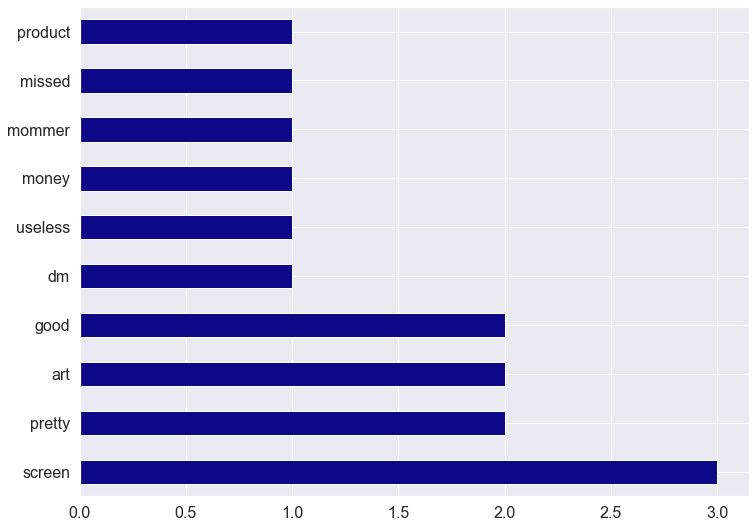

In [453]:
document_term_matrix['total_count'].plot.barh(figsize=(12, 9),
                                              fontsize=16,
                                              colormap ='plasma')

## 7. Discuss: Insights and observations

***Your observations here...***

Reviews: This histogram shows us that most reviews located in positive zone, so most of the users are expressing positive sentiment in their reviews.

Summary: Histogram shows us that most summaries sit in a positive part of the plot: users show a particularly strong sentiment in positive direction.

# 